In [2]:
# 1.Acquire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# 2. Parse

# Check data types and nulls
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
#  3.Filter

# Select key features
filtered_df = df[['HeartDisease', 'Age', 'Sex', 'ChestPainType', 'Cholesterol', 'MaxHR']].dropna()

# Convert categorical features to numeric
filtered_df['Sex'] = filtered_df['Sex'].map({'M': 1, 'F': 0})
filtered_df['ChestPainType'] = filtered_df['ChestPainType'].astype('category').cat.codes

filtered_df.head()


,HeartDisease,Age,Sex,ChestPainType,Cholesterol,MaxHR
0,0,40,1,1,289,172
1,1,49,0,2,180,156
2,0,37,1,1,283,98
3,1,48,0,0,214,108
4,0,54,1,2,195,122


In [5]:
#  4 Mine

# Count of HeartDisease
print("Heart Disease Presence:\n", filtered_df['HeartDisease'].value_counts())

# Average cholesterol by Heart Disease
print("\nAverage Cholesterol by HeartDisease:\n", filtered_df.groupby('HeartDisease')['Cholesterol'].mean())

# Correlation matrix
filtered_df.corr(numeric_only=True)


Heart Disease Presence:
 HeartDisease
1    508
0    410
Name: count, dtype: int64

Average Cholesterol by HeartDisease:
 HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64


,HeartDisease,Age,Sex,ChestPainType,Cholesterol,MaxHR
HeartDisease,1.000000,0.282039,0.305445,-0.386828,-0.232741,-0.400421
Age,0.282039,1.000000,0.055750,-0.077150,-0.095282,-0.382045
Sex,0.305445,0.055750,1.000000,-0.126559,-0.200092,-0.189186
ChestPainType,-0.386828,-0.077150,-0.126559,1.000000,0.067880,0.289123
Cholesterol,-0.232741,-0.095282,-0.200092,0.067880,1.000000,0.235792
MaxHR,-0.400421,-0.382045,-0.189186,0.289123,0.235792,1.000000


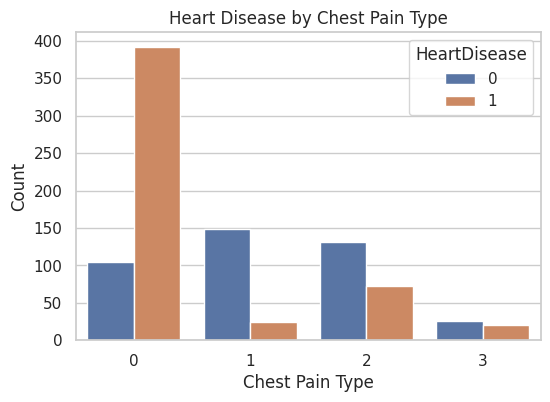

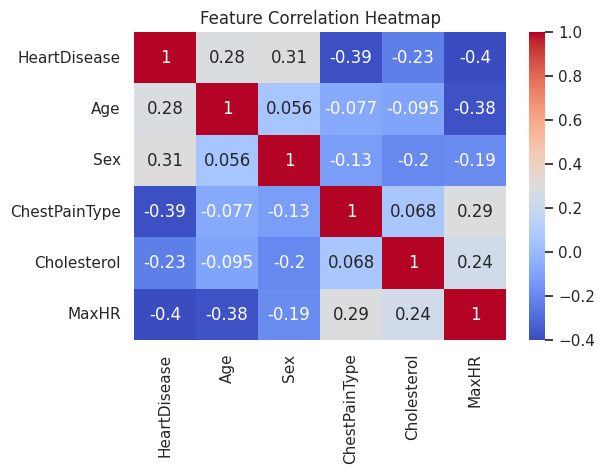

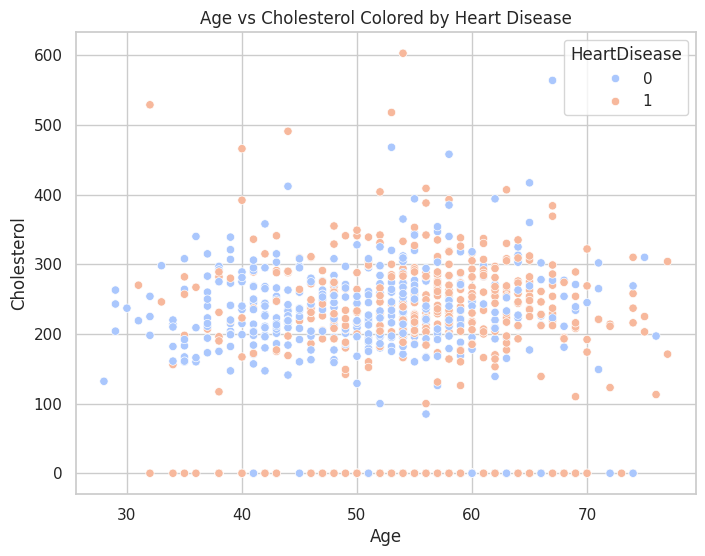

In [6]:
# 5 Represent

# Bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=filtered_df, x='ChestPainType', hue='HeartDisease')
plt.title('Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Cholesterol', hue='HeartDisease', palette='coolwarm')
plt.title('Age vs Cholesterol Colored by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


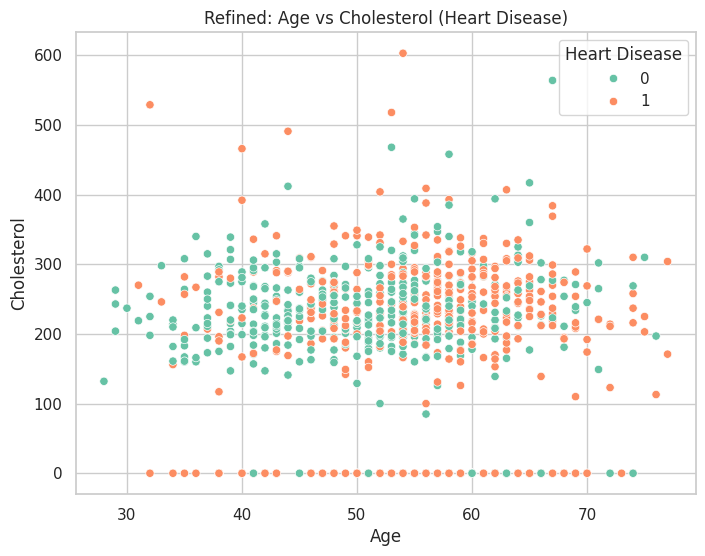

In [7]:
#  6 Refine

plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Age', y='Cholesterol', hue='HeartDisease', palette='Set2')
plt.title('Refined: Age vs Cholesterol (Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.legend(title='Heart Disease')
plt.show()


In [8]:
# 7 Interact

heart_disease_dropdown = widgets.Dropdown(
    options=filtered_df["HeartDisease"].unique(),
    description="Heart Disease:"
)

def show_heart_data(status):
    display(filtered_df[filtered_df["HeartDisease"] == status].head())

widgets.interact(show_heart_data, status=heart_disease_dropdown)


interactive(children=(Dropdown(description='Heart Disease:', options=(np.int64(0), np.int64(1)), value=np.int6…

<function __main__.show_heart_data(status)>